<a href="https://colab.research.google.com/github/Viktoriia-Osmanova/main-repo/blob/main/Python_DS_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import pandas as pd

# Використання відносного шляху до файлу
file_path = '/content/drive/My Drive/Colab Notebooks/bikes_rent.csv'


data = pd.read_csv(file_path)

# Огляд перших кількох рядків датасету
data.head()

Mounted at /content/drive


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

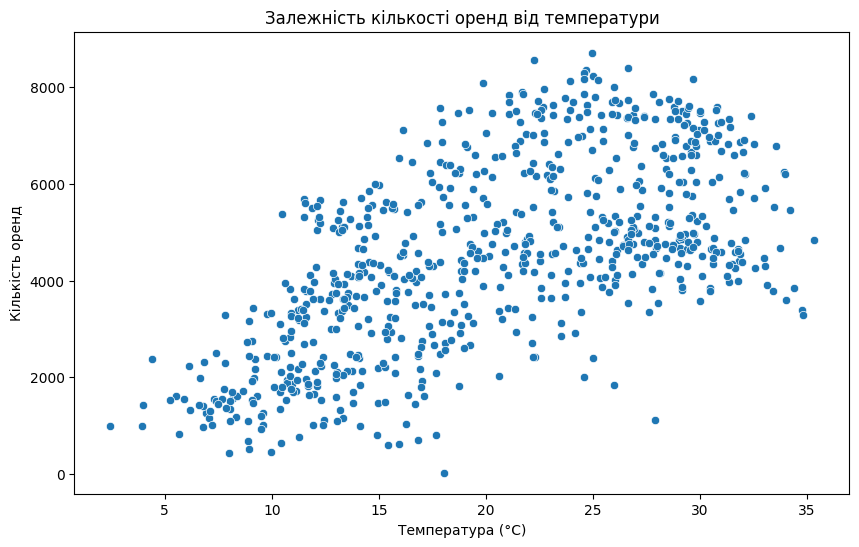

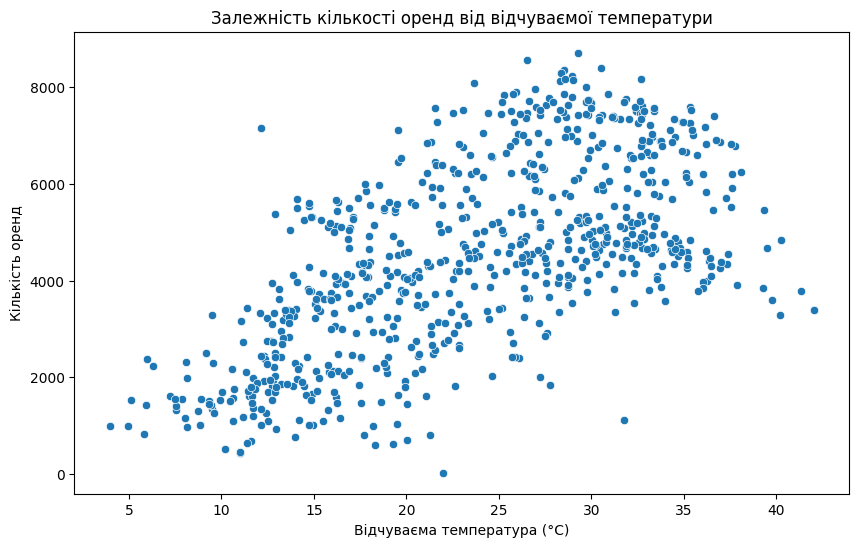

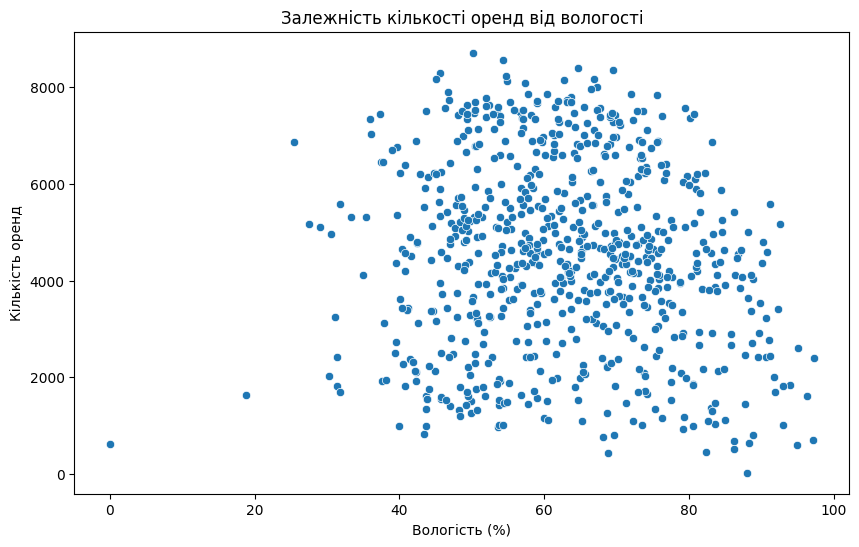

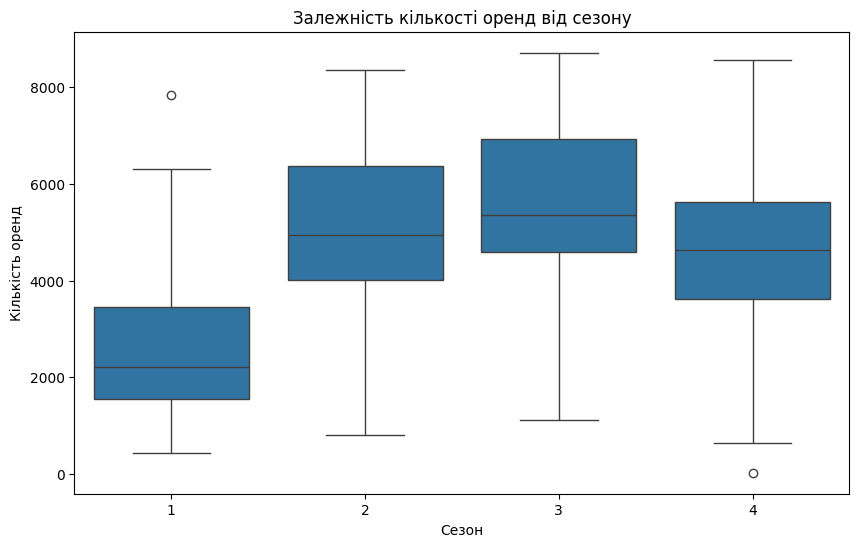

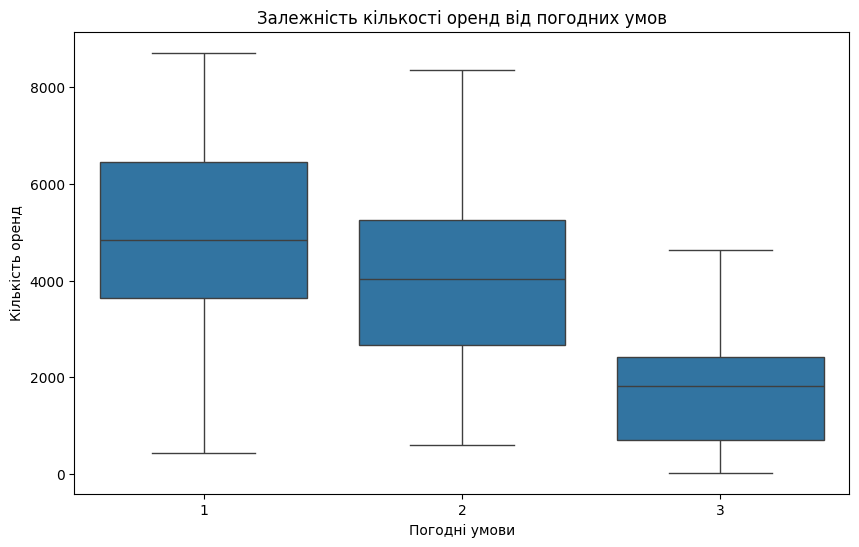

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

data[['temp', 'atemp']].head()

# Графік 1: Залежність cnt від temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['temp'], y=data['cnt'])
plt.title('Залежність кількості оренд від температури')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.show()

# Графік 2: Залежність cnt від atemp
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['atemp'], y=data['cnt'])
plt.title('Залежність кількості оренд від відчуваємої температури')
plt.xlabel('Відчуваєма температура (°C)')
plt.ylabel('Кількість оренд')
plt.show()

# Графік 3: Залежність cnt від hum
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['hum'], y=data['cnt'])
plt.title('Залежність кількості оренд від вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість оренд')
plt.show()

# Графік 4: Залежність cnt від season
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['season'], y=data['cnt'])
plt.title('Залежність кількості оренд від сезону')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.show()

# Графік 5: Залежність cnt від weathersit
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['weathersit'], y=data['cnt'])
plt.title('Залежність кількості оренд від погодних умов')
plt.xlabel('Погодні умови')
plt.ylabel('Кількість оренд')
plt.show()


__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [15]:
import pandas as pd

# Припустимо, 'data' містить всі ваші колонки
data = pd.DataFrame({
    'season': data['season'],
    'yr': data['yr'],
    'mnth': data['mnth'],
    'holiday': data['holiday'],
    'weekday': data['weekday'],
    'workingday': data['workingday'],
    'weathersit': data['weathersit'],
    'temp': data['temp'],
    'atemp': data['atemp'],
    'hum': data['hum'],
    'windspeed(mph)': data['windspeed(mph)'],
    'windspeed(ms)': data['windspeed(ms)']
})

# Обчислюємо кореляцію між усіма колонками
correlation_matrix = data.corr()

# Отримуємо кореляцію з 'season'
target_correlations = correlation_matrix['season']

print(target_correlations)


season            1.000000
yr               -0.001844
mnth              0.831440
holiday          -0.010537
weekday          -0.003080
workingday        0.012485
weathersit        0.019211
temp              0.334315
atemp             0.342876
hum               0.205445
windspeed(mph)   -0.229046
windspeed(ms)    -0.229046
Name: season, dtype: float64


У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

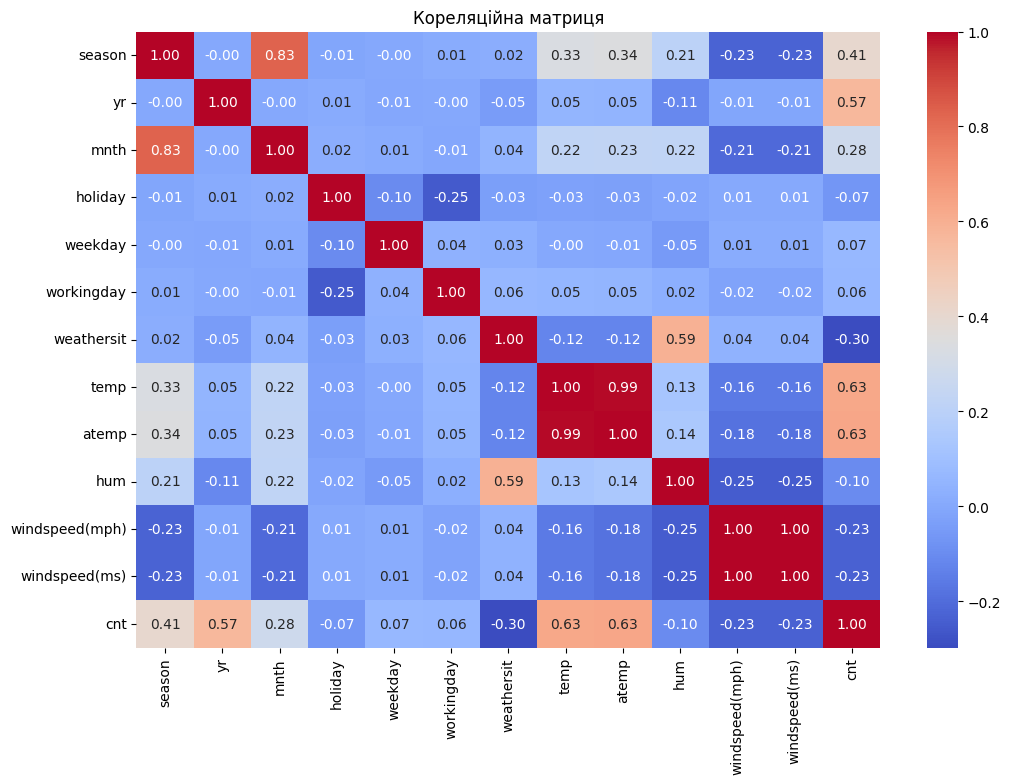

In [7]:
# Побудова кореляційної матриці
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця')
plt.show()


На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [16]:
# Обчислення середніх значень для числових колонок
mean_values = data.mean()

# Виведення середніх значень
print("\nСередні значення кожної колонки:")
print(mean_values)


Середні значення кожної колонки:
season             2.496580
yr                 0.500684
mnth               6.519836
holiday            0.028728
weekday            2.997264
workingday         0.683995
weathersit         1.395349
temp              20.310776
atemp             23.717699
hum               62.789406
windspeed(mph)    12.762576
windspeed(ms)      5.705220
dtype: float64


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [ ]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

NameError: ignored

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [ ]:
from sklearn.linear_model import LinearRegression

## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression



# 'cnt' —  цільова змінна, а решта колонок — ознаки
X = data.drop(columns='cnt')  # Ознаки
y = data['cnt']  # Цільова змінна

# Створення об'єкта лінійного регресора
model = LinearRegression()

# Навчання моделі на даних
model.fit(X, y)

# Отримання ваг моделі
weights = model.coef_

# Виведення пар (назва ознаки, вага)
print("Ознаки та відповідні ваги:")
for feature_name, weight in zip(X.columns, weights):
    print(f'Ознака: {feature_name}, Вага: {weight}')

Ознаки та відповідні ваги:
Ознака: season, Вага: 514.2756689772416
Ознака: yr, Вага: 2043.9333206099773
Ознака: mnth, Вага: -40.96317631503962
Ознака: holiday, Вага: -519.3860417173415
Ознака: weekday, Вага: 68.49569506058863
Ознака: workingday, Вага: 121.29281595858514
Ознака: weathersit, Вага: -606.4542679476724
Ознака: temp, Вага: 48.994172947818015
Ознака: atemp, Вага: 71.9163310082323
Ознака: hum, Вага: -10.230641893838651
Ознака: windspeed(mph), Вага: 2400995993962.544
Ознака: windspeed(ms), Вага: -5371028038579.01


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [34]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split


# Перевірка наявності колонок
print("Назви колонок у DataFrame:")
print(data.columns)

# 'cnt' — це цільова змінна, а решта колонок — ознаки
X = data.drop(columns='cnt')  # Ознаки
y = data['cnt']  # Цільова змінна

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення об'єкта лінійного регресора з L1-регуляризацією (Lasso)
lasso_model = Lasso()

# Навчання моделі Lasso
lasso_model.fit(X_train, y_train)

# Отримання ваг моделі Lasso
lasso_weights = lasso_model.coef_

# Виведення пар (назва ознаки, вага) для Lasso
print("Ознаки та відповідні ваги для Lasso:")
for feature_name, weight in zip(X.columns, lasso_weights):
    print(f'Ознака: {feature_name}, Вага: {weight}')




Назви колонок у DataFrame:
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')
Ознаки та відповідні ваги для Lasso:
Ознака: season, Вага: 521.4291589449327
Ознака: yr, Вага: 2019.4208593014257
Ознака: mnth, Вага: -37.51215021080504
Ознака: holiday, Вага: -353.60415907053414
Ознака: weekday, Вага: 72.90465307734695
Ознака: workingday, Вага: 158.63060194263434
Ознака: weathersit, Вага: -626.6085142119675
Ознака: temp, Вага: 52.786956006674394
Ознака: atemp, Вага: 68.44195311072238
Ознака: hum, Вага: -8.819719297045474
Ознака: windspeed(mph), Вага: -31.188257928481242
Ознака: windspeed(ms), Вага: -0.0


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [33]:
# Створення об'єкта лінійного регресора з L2-регуляризацією (Ridge)
ridge_model = Ridge()

# Навчання моделі Ridge
ridge_model.fit(X_train, y_train)

# Отримання ваг моделі Ridge
ridge_weights = ridge_model.coef_

# Виведення пар (назва ознаки, вага) для Ridge
print("\nОзнаки та відповідні ваги для Ridge:")
for feature_name, weight in zip(X.columns, ridge_weights):
    print(f'Ознака: {feature_name}, Вага: {weight}')


Ознаки та відповідні ваги для Ridge:
Ознака: season, Вага: 521.8876469697622
Ознака: yr, Вага: 2009.5368914358933
Ознака: mnth, Вага: -37.677895808911586
Ознака: holiday, Вага: -366.2604607181555
Ознака: weekday, Вага: 72.96703460704948
Ознака: workingday, Вага: 160.74149027255805
Ознака: weathersit, Вага: -625.6001139391055
Ознака: temp, Вага: 51.05947691315805
Ознака: atemp, Вага: 70.0461450879972
Ознака: hum, Вага: -8.9033962787487
Ознака: windspeed(mph), Вага: -26.012315733064185
Ознака: windspeed(ms), Вага: -11.6282145775756


### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split


# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.arange(1, 500, 50)


coefs_lasso = []
coefs_ridge = []


for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefs_lasso.append(lasso_model.coef_)

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefs_ridge.append(ridge_model.coef_)


coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)


print("\nВаги Lasso для перших кількох значень альфа:")
print(coefs_lasso[:5])

print("\nВаги Ridge для перших кількох значень альфа:")
print(coefs_ridge[:5])



Ваги Lasso для перших кількох значень альфа:
[[ 521.42915894 2019.4208593   -37.51215021 -353.60415907   72.90465308
   158.63060194 -626.60851421   52.78695601   68.44195311   -8.8197193
   -31.18825793   -0.        ]
 [ 375.75775212 1795.78891384    0.           -0.           60.27092975
     0.         -319.53694592   49.29456639   79.12981499  -17.11353617
   -35.850612     -0.        ]
 [ 285.55362691 1578.26811868   16.90358432   -0.           42.99073399
     0.          -33.00036606   44.26196772   89.38733159  -24.7908111
   -40.70146471   -0.        ]
 [ 164.99573708 1370.55925364   44.7831851    -0.           29.45698204
     0.           -0.           41.14054173   95.21328184  -26.09964494
   -40.55202682   -0.        ]
 [  44.79207654 1164.35875567   72.4732331    -0.           16.46635487
     0.           -0.           37.05178911  101.53492215  -26.56032776
   -39.7259125    -0.        ]]

Ваги Ridge для перших кількох значень альфа:
[[ 521.88764697 2009.53689144  -37

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

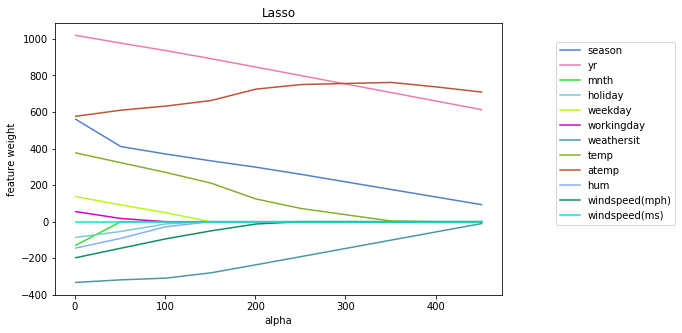

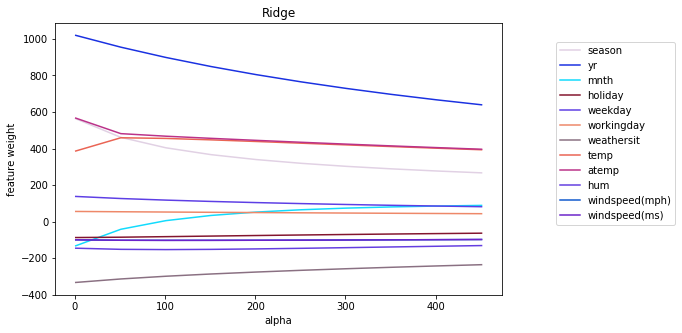

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [ ]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

Назви колонок у DataFrame:
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')


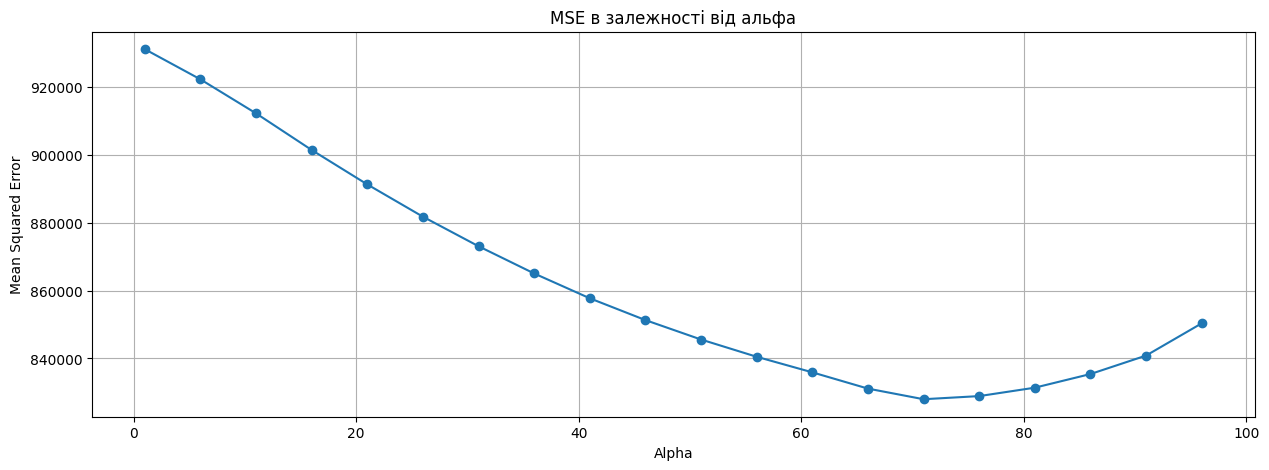

Вибране значення alpha: 26

Ознаки та відповідні коефіцієнти:
Ознака: season, Коефіцієнт: 426.6462729983022
Ознака: yr, Коефіцієнт: 1905.8824751156908
Ознака: mnth, Коефіцієнт: -10.369724723638033
Ознака: holiday, Коефіцієнт: -0.0
Ознака: weekday, Коефіцієнт: 68.23416698758882
Ознака: workingday, Коефіцієнт: 61.3971049013357
Ознака: weathersit, Коефіцієнт: -468.9333639445943
Ознака: temp, Коефіцієнт: 51.455414414410136
Ознака: atemp, Коефіцієнт: 73.92300228291548
Ознака: hum, Коефіцієнт: -13.157182152561965
Ознака: windspeed(mph), Коефіцієнт: -33.37295981743844
Ознака: windspeed(ms), Коефіцієнт: -0.0


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Функція для побудови графіків
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y, marker='o')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()



# Перевірка наявності колонок
print("Назви колонок у DataFrame:")
print(data.columns)

# 'cnt' — цільова змінна, а решта колонок — ознаки
X = data.drop(columns='cnt')  # Ознаки
y = data['cnt']  # Цільова змінна

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Діапазон значень альфа
alphas = np.arange(1, 100, 5)

# Створення об'єкта LassoCV
regressor = LassoCV(alphas=alphas, cv=3)

# Навчання моделі
regressor.fit(X_train, y_train)

# Отримання усередненого MSE за рядками
mse_path = regressor.mse_path_
mean_mse = mse_path.mean(axis=1)

# Побудова графіка усередненого MSE в залежності від альфа
create_plot(list(zip(alphas, mean_mse)),
            title='MSE в залежності від альфа',
            xlabel='Alpha',
            ylabel='Mean Squared Error')

# Виведення вибраного alpha та пар (ознака-коефіцієнт)
best_alpha = regressor.alpha_
print(f"Вибране значення alpha: {best_alpha}")

print("\nОзнаки та відповідні коефіцієнти:")
for feature_name, coef in zip(X.columns, regressor.coef_):
    print(f'Ознака: {feature_name}, Коефіцієнт: {coef}')





Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


Назви колонок у DataFrame:
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)',
       'cnt'],
      dtype='object')
Alphas with minimum MSE:
Fold 1: Alpha = 26, MSE = 864523.6145014421
Fold 2: Alpha = 21, MSE = 728827.4765880516
Fold 3: Alpha = 16, MSE = 887790.431474963


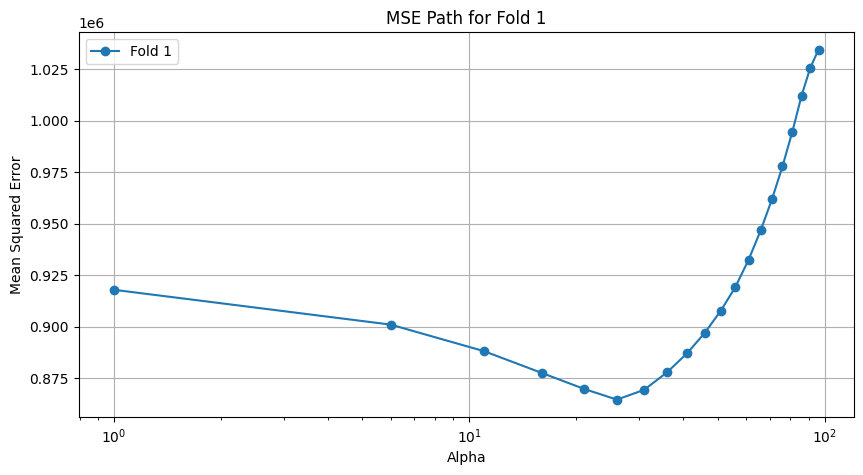

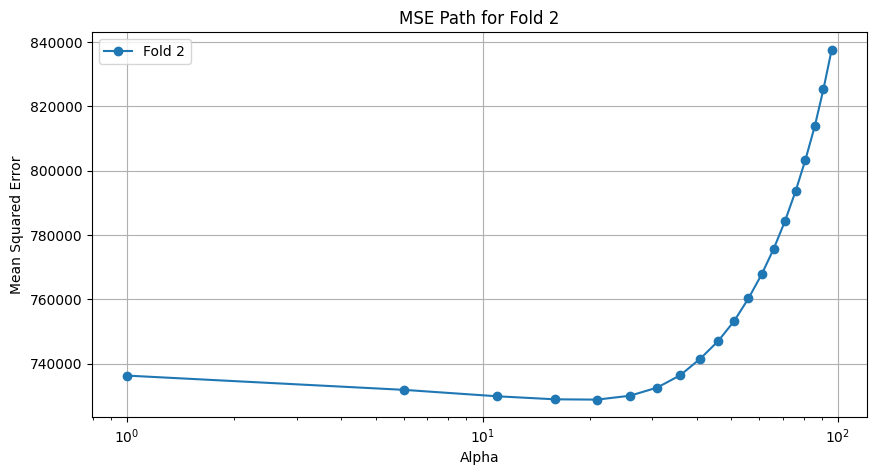

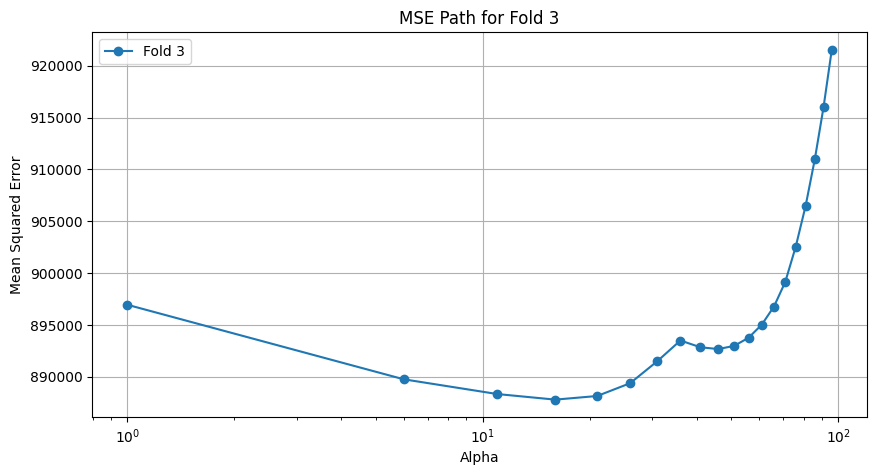

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Функція для побудови графіків
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y, marker='o')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()



# Перевірка наявності колонок
print("Назви колонок у DataFrame:")
print(data.columns)

# 'cnt' — це цільова змінна, а решта колонок — ознаки
X = data.drop(columns='cnt')  # Ознаки
y = data['cnt']  # Цільова змінна

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Діапазон значень альфа
alphas = np.arange(1, 100, 5)

# Створення об'єкта LassoCV
regressor = LassoCV(alphas=alphas, cv=3)

# Навчання моделі
regressor.fit(X_train, y_train)

# Отримання усередненого MSE за рядками
mse_path = regressor.mse_path_

# Знаходження альфа з мінімальним MSE для кожного розбиття
min_mse_indices = np.argmin(mse_path, axis=0)
min_mses = mse_path[min_mse_indices, np.arange(mse_path.shape[1])]

# Виведення альфа і MSE для кожного розбиття
print("Alphas with minimum MSE:")
for i, (alpha, mse) in enumerate(zip(regressor.alphas_[min_mse_indices], min_mses)):
    print(f"Fold {i+1}: Alpha = {alpha}, MSE = {mse}")

# Побудова графіків MSE для кожного розбиття
for i in range(mse_path.shape[1]):
    plt.figure(figsize=(10, 5))
    plt.plot(regressor.alphas_, mse_path[:, i], marker='o', label=f'Fold {i+1}')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE Path for Fold {i+1}')
    plt.grid()
    plt.legend()
    plt.show()


На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


# 'cnt' — це цільова змінна, а решта колонок — ознаки
X = data.drop(columns='cnt')  # Ознаки
y = data['cnt']  # Цільова змінна

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Діапазон значень альфа
alphas = np.arange(1, 100, 5)

# Створення об'єкта LassoCV
regressor = LassoCV(alphas=alphas, cv=3)

# Навчання моделі
regressor.fit(X_train, y_train)

# Отримання коефіцієнтів моделі
coefficients = regressor.coef_

# Створення DataFrame для зручності
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Вибір 4 ознак з найбільшими позитивними коефіцієнтами
top_positive_features = coeff_df[coeff_df['Coefficient'] > 0].nlargest(4, 'Coefficient')
print("4 ознаки з найбільшими позитивними коефіцієнтами:")
print(top_positive_features)


4 ознаки з найбільшими позитивними коефіцієнтами:
   Feature  Coefficient
1       yr  1905.882475
0   season   426.646273
8    atemp    73.923002
4  weekday    68.234167


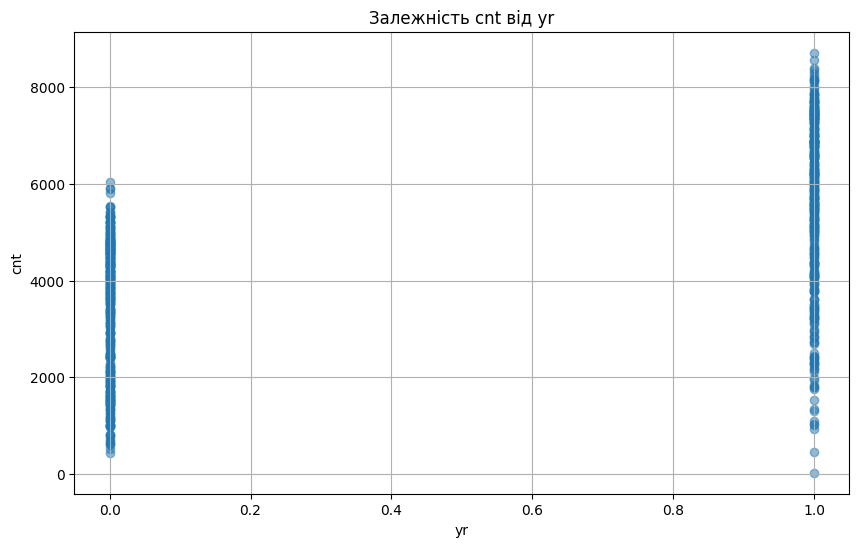

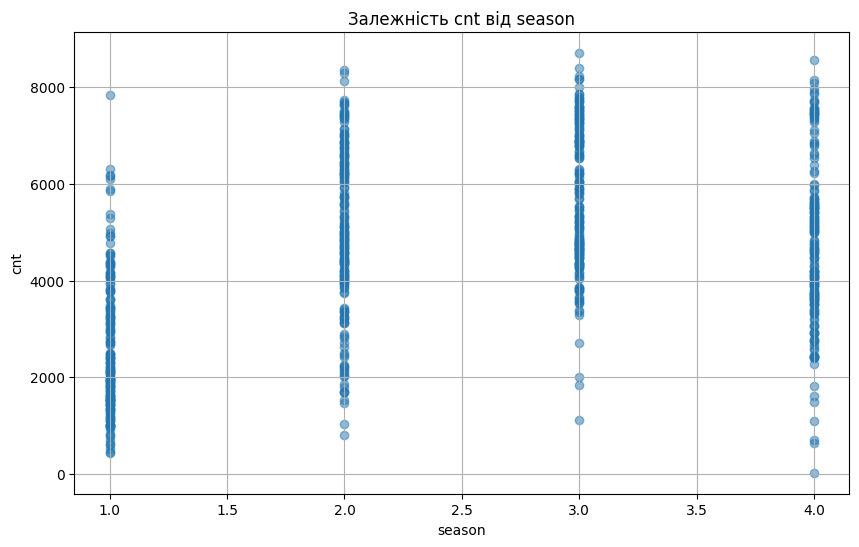

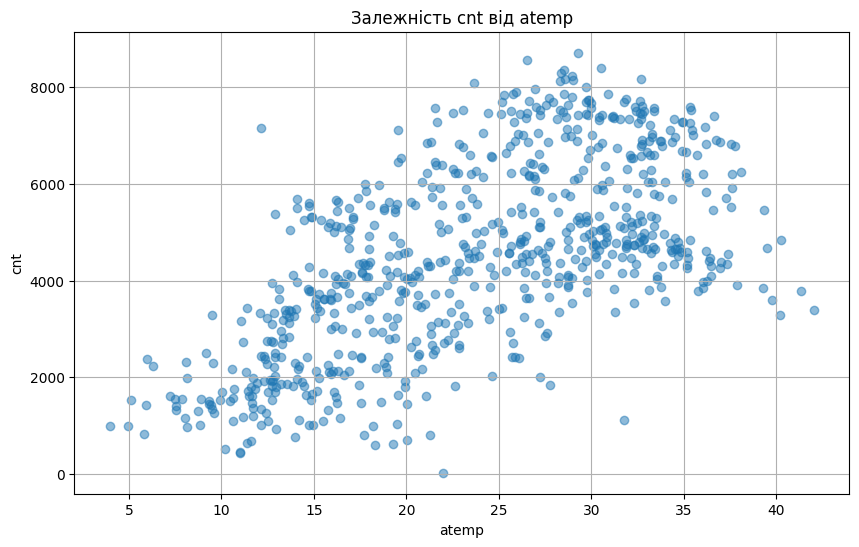

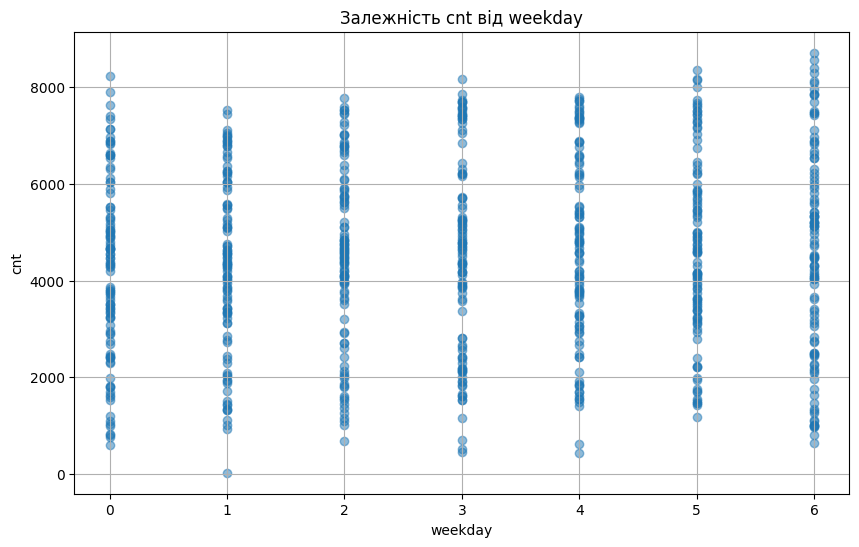

In [45]:
import matplotlib.pyplot as plt

# Візуалізація залежностей
def plot_feature_vs_target(feature_name, data, target):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature_name], target, alpha=0.5)
    plt.title(f'Залежність {target.name} від {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel(target.name)
    plt.grid(True)
    plt.show()

# Побудова графіків для кожної з топ-4 ознак
for feature in top_positive_features['Feature']:
    plot_feature_vs_target(feature, data, data['cnt'])



Температура (atemp): попит на велосипеди максимальний при комфортних, не надто високих температурах.

Рік (yr): Попит на велосипеди зростає з роком.

Сезон (season): Найвищий попит у сезоні 3 осінь

День тижня (weekday): Найбільший попит у дні 6 (неділя), 5 (субота) і 0 (понеділок)

#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split



# 'cnt' — це цільова змінна, а решта колонок — ознаки
X = data.drop(columns='cnt')  # Ознаки
y = data['cnt']  # Цільова змінна

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Діапазон значень альфа
alphas = np.arange(1, 100, 5)

# Створення об'єкта LassoCV
regressor = LassoCV(alphas=alphas, cv=3)

# Навчання моделі
regressor.fit(X_train, y_train)

# Отримання коефіцієнтів моделі
coefficients = regressor.coef_

# Створення DataFrame для зручності
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Вибір 3 ознак з найбільшими за модулем негативними коефіцієнтами
negative_features = coeff_df[coeff_df['Coefficient'] < 0]
top_3_negative_features = negative_features.reindex(negative_features['Coefficient'].abs().nlargest(3).index)

print("3 ознаки з найбільшими за модулем негативними коефіцієнтами:")
print(top_3_negative_features)


3 ознаки з найбільшими за модулем негативними коефіцієнтами:
           Feature  Coefficient
6       weathersit  -468.933364
10  windspeed(mph)   -33.372960
9              hum   -13.157182


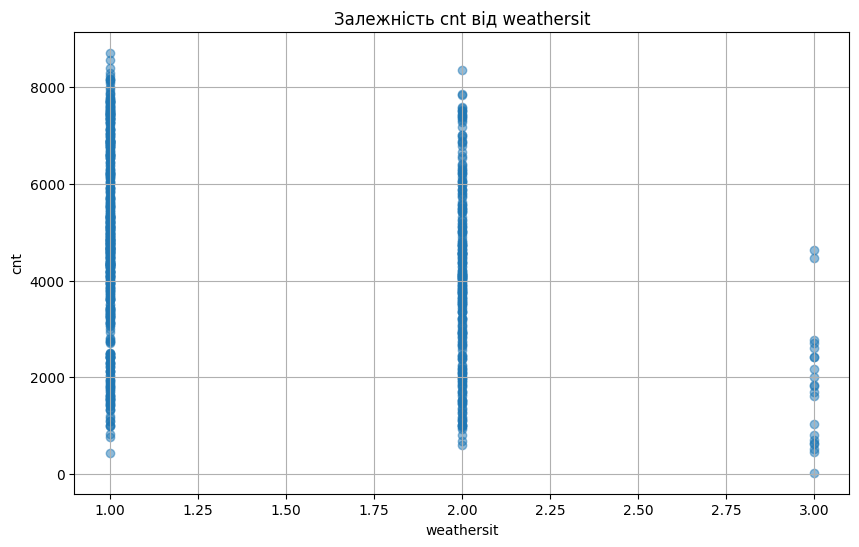

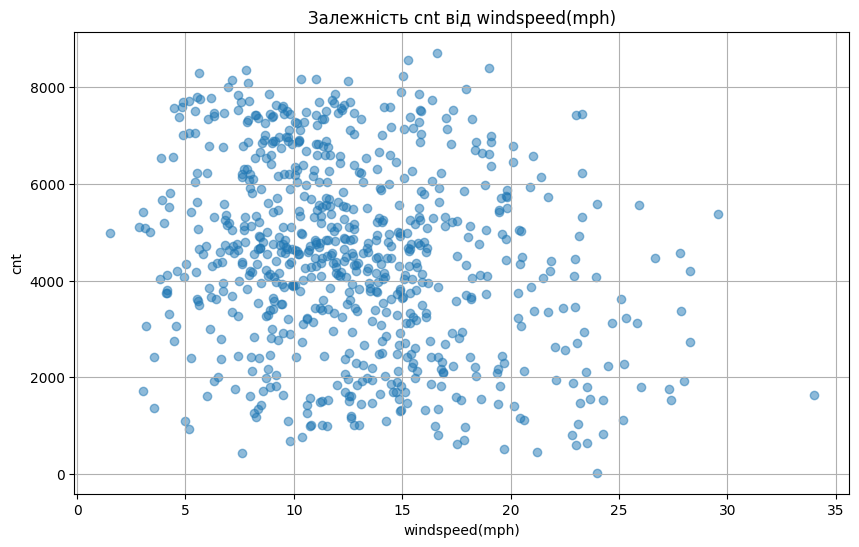

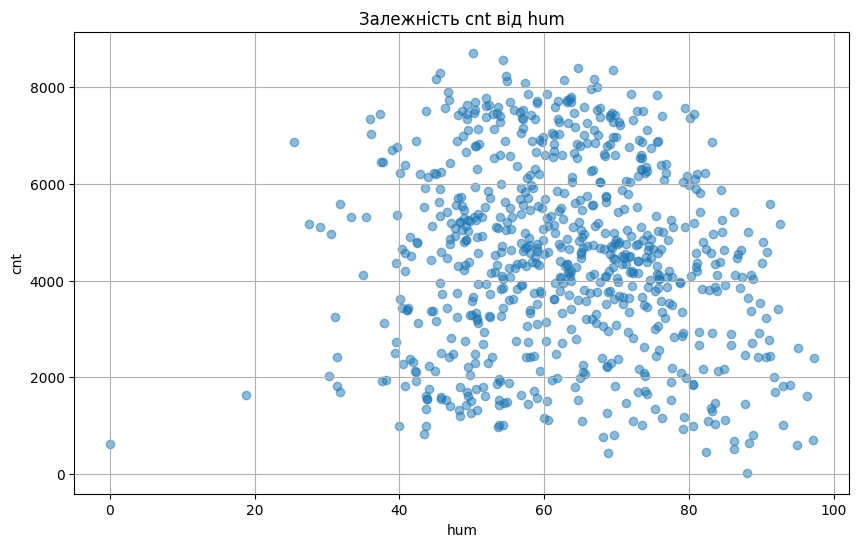

In [50]:
import matplotlib.pyplot as plt

# Візуалізація залежностей
def plot_feature_vs_target(feature_name, data, target):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature_name], target, alpha=0.5)
    plt.title(f'Залежність {target.name} від {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel(target.name)
    plt.grid(True)
    plt.show()

# Побудова графіків для кожної з топ-3 негативних ознак
features_to_plot = ['weathersit', 'windspeed(mph)', 'hum']
for feature in features_to_plot:
    plot_feature_vs_target(feature, data, data['cnt'])


1)збільшення значення weathersit супроводжується зменшенням попиту
2)графік показує зменшення попиту при збільшенні швидкості вітру
3)зростання вологості призводить до зменшення попиту на велосипеди

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

In [53]:
# Вибір ознак з коефіцієнтами близькими до нуля (< 1e-3)
negligible_features = coeff_df[coeff_df['Coefficient'].abs() < 1e-3]

print("Ознаки з коефіцієнтами близькими до нуля:")
print(negligible_features)


Ознаки з коефіцієнтами близькими до нуля:
          Feature  Coefficient
3         holiday         -0.0
11  windspeed(ms)         -0.0


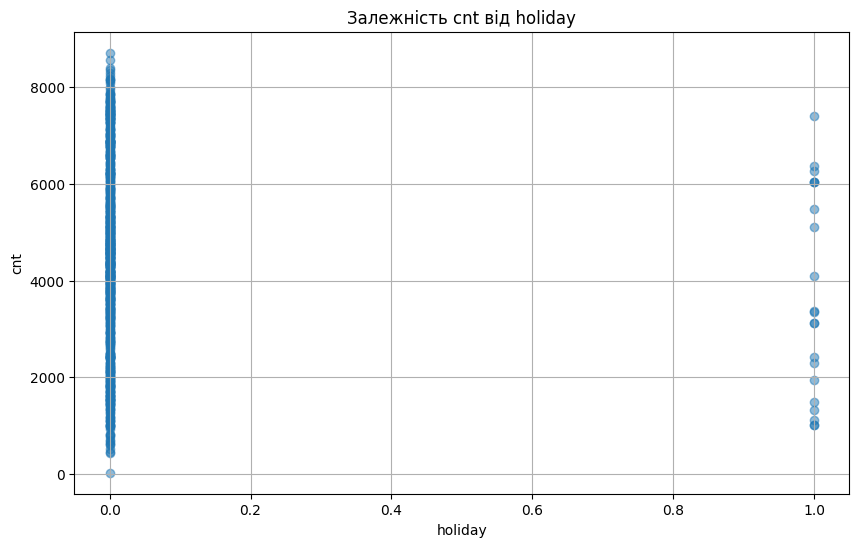

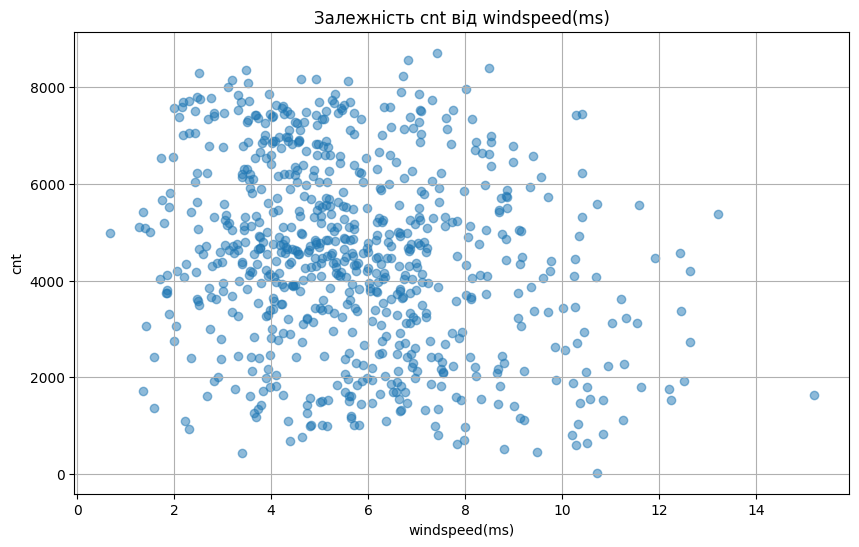

In [52]:
# Візуалізація залежностей для ознак з коефіцієнтами близькими до нуля
for feature in ['holiday', 'windspeed(ms)']:
    plot_feature_vs_target(feature, data, data['cnt'])


In [ ]:
зі збільшенням вітру попит зменшується, але не до нуля.

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.